# David Kartchner
# CS 501
# Lab 3: Gradient Descent

### Import some useful libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
%matplotlib inline

###Import CIFAR data and randomly choose 10 features

In [72]:
def unpickle( file ):
    import pickle
    fo = open(file, 'rb')
    dict = pickle.load(fo)
    fo.close()
    return dict
 
data = unpickle('cifar-10-batches-py/data_batch_1')
 
features = np.atleast_2d(data['data'])
labels = data['labels']
labels = np.atleast_2d(labels).T
 
N = 1000
D = 10
 
# only keep N items
features = features[0:N,:] 
labels = labels[0:N,:]
 
# project down into a D-dimensional space
features = np.dot(features, np.random.randn(3072, D))
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
features = np.transpose(features)
print features.shape

(10, 1000)


###Define Score, Softmax Loss, and Numerical Gradient functions

In [43]:
def linear_score(W, X):
    """
    Calculate score of a vector of data using a linear score function
    
    Inuts:
        W - m x r weight matrix corresponding to current training weights from the data
        X - r x n matrix of features
        
        ***In the above, note that:
            1.  r corresponds to the number of features
            2.  n corresponds to the number of observations
            3.  m corresponds to the number of classes
        
    Returns:
        scores - m x k matrix of scores corresponding to each observation and each class
    """
    return W.dot(x)

In [70]:
def softmax_loss(W, X, Y):
    """
    Calculate the softmax loss of a classifier with a linear scoring function
    
    Inputs:
        W          - m x r weight matrix corresponding to current training weights from the data
        X          - r x n matrix of features
        Y          - n x 1 vector of labels corresponding to features in X
        
        ***In the above, note that:
            1.  r corresponds to the number of features
            2.  n corresponds to the number of observations
            3.  m corresponds to the number of classes
        
    Returns:
        loss       - Value corresponding to the softmax loss for a 
    """
    #Calculate Scores
    scores = W.dot(X)
    
    #Calculate Softmax Probabilities
    exp_scores = np.exp(scores)
    exp_scores *= exp_scores.max(axis=0)
    exp_scores /= np.sum(exp_scores, axis=0)
    
    loss = np.mean(-np.log(exp_scores[Y.flatten(),np.arange(exp_scores.shape[1])]))
    
    return loss

In [74]:
def numerical_gradient(W, loss_func, X, Y):
    """
    Calculate the softmax loss of a classifier with a given scoring function
    
    Inputs:
        W          - m x r weight matrix corresponding to current training weights from the data
        loss_func  - Function to calculate loss for given data and weights
        X          - r x n matrix of features
        Y          - n x 1 vector of labels corresponding to features in X
        
        ***In the above, note that:
            1.  r corresponds to the number of features
            2.  n corresponds to the number of observations
            3.  m corresponds to the number of classes
        
    Returns:
        loss       - Score of the loss function for given weight matrix W
        grad       - Numerically calculated gradient of weight matrix W
    """
    #Define our step size for calculating numerical derivative
    h=.000001
    
    #Create buffer for numerical gradient
    grad = np.zeros_like(W)
    
    #Calculate loss for W
    loss = loss_func(W,X,Y)
    
    #Calculate gradient by calculating individual partials
    for i in xrange(W.shape[0]):
        for j in xrange(W.shape[1]):
            #Increment the [i,j] element of W to calculate partial derivative
            W_h = W.copy()
            W_h[i,j] += h
            
            #Calculate partial derivative
            grad[i,j] = ((loss_func(W_h, X, Y) - loss)/h)
            
    return loss, grad

###Run Gradient Descent and plot the results

In [85]:
n_epochs = 1000
learning_rate = .1
losses = []
accuracies = []
weights = np.random.randn(10,10)
for i in xrange(n_epochs):
    #Calculate accuracy at each iteration
    acc = np.mean(np.argmax(weights.dot(features), axis=0)==labels.flatten())
    
    #Calculate loss and gradient of function
    loss, grad = numerical_gradient(weights, softmax_loss, features, labels)
    
    #Update weights
    weights -= learning_rate*grad
    
    #Store loss and accuracy at each iteration
    losses.append(loss)
    accuracies.append(acc)

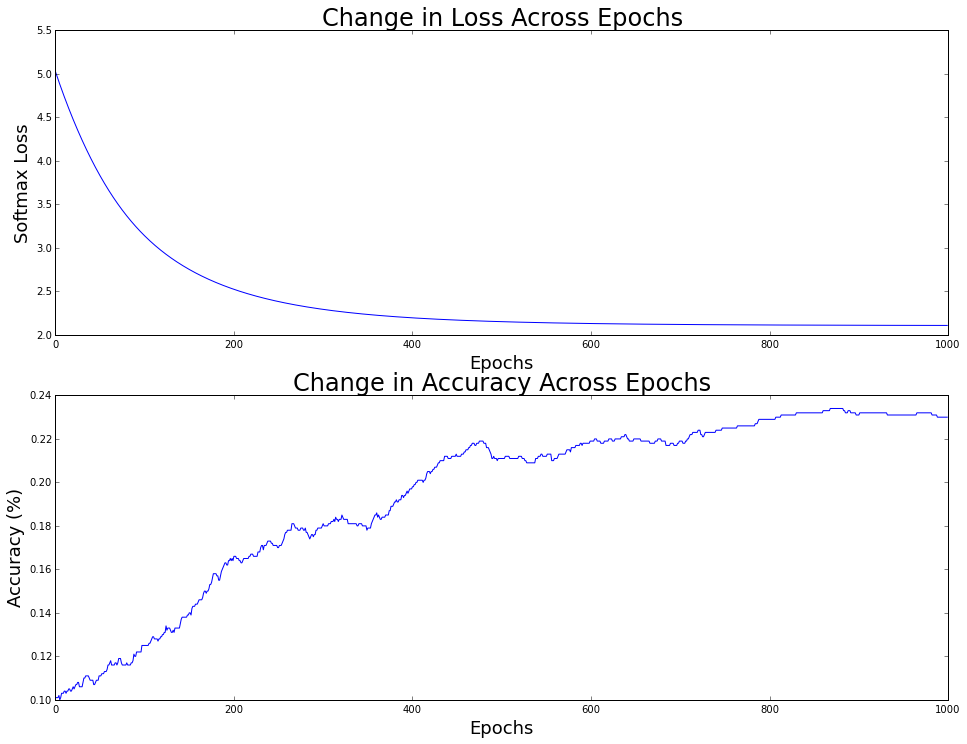

In [86]:
#Plot the loss and accuracy across epochs    
plt.figure(figsize=(16,12))

#Plot loss
plt.subplot(211)
plt.title("Change in Loss Across Epochs", fontsize=24)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Softmax Loss", fontsize=18)
plt.plot(np.arange(n_epochs),losses)

#Plot accuracy
plt.subplot(212)
plt.title("Change in Accuracy Across Epochs", fontsize=24)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Accuracy (%)", fontsize=18)
plt.plot(np.arange(n_epochs),accuracies)

#Show plots
plt.show()